# Loading Data from SQLite database

In [3]:
import pandas as pd
from pathlib import Path
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

In [4]:
connection = sqlite3.connect('proj4_grp2.sqlite')
raw_data = pd.read_sql_query("SELECT * FROM realestate_info where state = 'AZ'", connection)
raw_data.head()

,property_id,address,street_name,city,state,latitude,longitude,postcode,price,bedroom_number,bathroom_number,price_per_unit,living_space,land_space,property_type
0,8352055,"854 Citrus St, Bullhead City, AZ 86442",Citrus St,Bullhead City,AZ,35.114260,-114.618385,86442,54900.0,2.0,1.0,79.0,688.0,5000.0,MANUFACTURED
1,64954116,"1825 E Shore Villas Dr UNIT 33, Bullhead City,...",E Shore Villas Dr UNIT 33,Bullhead City,AZ,35.122700,-114.589750,86442,379900.0,3.0,3.0,230.0,1649.0,3640.0,SINGLE_FAMILY
2,71677227,"790 Stahlman Dr, Bullhead City, AZ 86442",Stahlman Dr,Bullhead City,AZ,35.118100,-114.620620,86442,549900.0,3.0,4.0,169.0,3250.0,10225.0,SINGLE_FAMILY
3,8351548,"905 Citrus St, Bullhead City, AZ 86442",Citrus St,Bullhead City,AZ,35.114693,-114.616250,86442,169900.0,3.0,2.0,146.0,1157.0,5000.0,MANUFACTURED
4,8352036,"787 Citrus St, Bullhead City, AZ 86442",Citrus St,Bullhead City,AZ,35.114700,-114.621220,86442,169900.0,2.0,2.0,117.0,1440.0,4791.6,MANUFACTURED


In [6]:
# Selecting usefull Columns and Dropping others
raw_data = raw_data[['property_id','address','street_name','city','state','latitude','longitude','postcode'
            ,'price','bedroom_number','bathroom_number','price_per_unit','living_space','land_space', 'property_type']]

In [7]:
raw_data

,property_id,address,street_name,city,state,latitude,longitude,postcode,price,bedroom_number,bathroom_number,price_per_unit,living_space,land_space,property_type
0,8352055,"854 Citrus St, Bullhead City, AZ 86442",Citrus St,Bullhead City,AZ,35.114260,-114.618385,86442,54900.0,2.0,1.0,79.0,688.0,5000.000,MANUFACTURED
1,64954116,"1825 E Shore Villas Dr UNIT 33, Bullhead City,...",E Shore Villas Dr UNIT 33,Bullhead City,AZ,35.122700,-114.589750,86442,379900.0,3.0,3.0,230.0,1649.0,3640.000,SINGLE_FAMILY
2,71677227,"790 Stahlman Dr, Bullhead City, AZ 86442",Stahlman Dr,Bullhead City,AZ,35.118100,-114.620620,86442,549900.0,3.0,4.0,169.0,3250.0,10225.000,SINGLE_FAMILY
3,8351548,"905 Citrus St, Bullhead City, AZ 86442",Citrus St,Bullhead City,AZ,35.114693,-114.616250,86442,169900.0,3.0,2.0,146.0,1157.0,5000.000,MANUFACTURED
4,8352036,"787 Citrus St, Bullhead City, AZ 86442",Citrus St,Bullhead City,AZ,35.114700,-114.621220,86442,169900.0,2.0,2.0,117.0,1440.0,4791.600,MANUFACTURED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18162,8008882,"14012 N 10th Pl, Phoenix, AZ 85022",N 10th Pl,Phoenix,AZ,33.613540,-112.060814,85022,599900.0,3.0,2.0,345.0,1736.0,7405.200,SINGLE_FAMILY
18163,35971142,"735 E Rose Marie Ln, Phoenix, AZ 85022",E Rose Marie Ln,Phoenix,AZ,33.652410,-112.064230,85022,419337.0,3.0,2.0,295.0,1419.0,3715.000,SINGLE_FAMILY
18164,8002235,"741 E Michelle Dr, Phoenix, AZ 85022",E Michelle Dr,Phoenix,AZ,33.650375,-112.063675,85022,405000.0,2.0,2.0,372.0,1088.0,3983.000,SINGLE_FAMILY
18165,8008861,"835 E Hearn Rd, Phoenix, AZ 85022",E Hearn Rd,Phoenix,AZ,33.614693,-112.062390,85022,795000.0,3.0,3.0,318.0,2500.0,11194.920,SINGLE_FAMILY


In [8]:
raw_data.isnull().sum()

property_id        0
address            0
street_name        0
city               0
state              0
latitude           0
longitude          0
postcode           0
price              0
bedroom_number     0
bathroom_number    0
price_per_unit     0
living_space       0
land_space         0
property_type      0
dtype: int64

In [10]:
arizona_state_data = raw_data[raw_data['state'] == 'AZ']

In [11]:
# Reset the index
arizona_state_data = arizona_state_data.reset_index(drop=True)

# Display the shortlisted data
arizona_state_data.head()

,property_id,address,street_name,city,state,latitude,longitude,postcode,price,bedroom_number,bathroom_number,price_per_unit,living_space,land_space,property_type
0,8352055,"854 Citrus St, Bullhead City, AZ 86442",Citrus St,Bullhead City,AZ,35.114260,-114.618385,86442,54900.0,2.0,1.0,79.0,688.0,5000.0,MANUFACTURED
1,64954116,"1825 E Shore Villas Dr UNIT 33, Bullhead City,...",E Shore Villas Dr UNIT 33,Bullhead City,AZ,35.122700,-114.589750,86442,379900.0,3.0,3.0,230.0,1649.0,3640.0,SINGLE_FAMILY
2,71677227,"790 Stahlman Dr, Bullhead City, AZ 86442",Stahlman Dr,Bullhead City,AZ,35.118100,-114.620620,86442,549900.0,3.0,4.0,169.0,3250.0,10225.0,SINGLE_FAMILY
3,8351548,"905 Citrus St, Bullhead City, AZ 86442",Citrus St,Bullhead City,AZ,35.114693,-114.616250,86442,169900.0,3.0,2.0,146.0,1157.0,5000.0,MANUFACTURED
4,8352036,"787 Citrus St, Bullhead City, AZ 86442",Citrus St,Bullhead City,AZ,35.114700,-114.621220,86442,169900.0,2.0,2.0,117.0,1440.0,4791.6,MANUFACTURED


In [12]:
arizona_state_data.shape

(18167, 15)

In [13]:
arizona_state_data.to_csv("arizona_state_data.csv")

# Price Prediction -- State==Arizona 

In [15]:
# Selecting features (X) and target variable (y)
features = ['bedroom_number', 'bathroom_number', 'living_space','city']
target = 'price'

X = arizona_state_data[features]
y = arizona_state_data[target]

X = pd.get_dummies(X, columns=['city'], drop_first=True)

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Create a RandomForestRegressor
model = RandomForestRegressor(n_estimators=200, random_state=42)
# Fit the model to the training data
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

### Here we enter Client's requirement to give a Predicted price based on 4 Features 
####                       1. #Bedrooms 2. #Bathrooms 3. Living Space 4. City of his choice

In [18]:
# Using the model to predict 'price' by Client's input
client_data = pd.DataFrame({'bedroom_number': [4], 'bathroom_number': [3], 'living_space': [2500], 'city': ['Chino Valley']})

In [19]:
# One-hot encode the 'city' column in the new data
client_data_encoded = pd.get_dummies(client_data, columns=['city'], drop_first=True)

# Columns in the new data match the columns used during training
missing_columns = set(X_train.columns) - set(client_data_encoded.columns)
for column in missing_columns:
    client_data_encoded[column] = 0  # Add missing columns with value 0

C:\Users\supre\AppData\Local\Temp\ipykernel_21880\4278839588.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  client_data_encoded[column] = 0  # Add missing columns with value 0
C:\Users\supre\AppData\Local\Temp\ipykernel_21880\4278839588.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  client_data_encoded[column] = 0  # Add missing columns with value 0
C:\Users\supre\AppData\Local\Temp\ipykernel_21880\4278839588.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert`

In [20]:
# Reorder columns to match the training data order
client_data_encoded = client_data_encoded[X_train.columns]

In [21]:
# Predict the price using the model from Encoded data c/o feature 'city' 002
predicted_price = model.predict(client_data_encoded)
print(f'Predicted Price: {predicted_price}')

Predicted Price: [516541.8475]


### Number of Bathrooms plays significant role in Adding up the value of the house

In [22]:
# Evaluate the model on the training data
predicted_train = model.predict(X_train)

# R-squared (R2) score on the train data
r2_train = r2_score(y_train, predicted_train)
print(f'R-squared (R2) Score on Training Data: {r2_train}')

# Evaluate the model on the test data
predicted_test = model.predict(X_test)

# R-squared (R2) score on the test data
r2_test = r2_score(y_test, predicted_test)
print(f'R-squared (R2) Score on Testing Data: {r2_test}')

R-squared (R2) Score on Training Data: 0.962116364696777
R-squared (R2) Score on Testing Data: 0.7620556307597843


In [23]:
# Evaluate the model on the training data
predicted_train = model.predict(X_train)

# Mean Absolute Error (MAE) on the training data
mae_train = mean_absolute_error(y_train, predicted_train)
print(f'Mean Absolute Error on Training Data: {mae_train}')

# Evaluate the model on the test data
predicted_test = model.predict(X_test)

# Mean Absolute Error (MAE) on the test data
mae_test = mean_absolute_error(y_test, predicted_test)
print(f'Mean Absolute Error on Testing Data: {mae_test}')

Mean Absolute Error on Training Data: 40150.864581059905
Mean Absolute Error on Testing Data: 96945.72941746595


### Geeting the mean of the lat and lon for sharing with recomendation model which uses this info to recomend nearby properties

In [24]:
# Group by 'city' and calculate average latitude and longitude
average_coordinates = arizona_state_data.groupby('city').agg({'latitude': 'mean', 'longitude': 'mean'}).reset_index()

# Display the result
average_coordinates.head()

,city,latitude,longitude
0,Ages Brookside,33.085636,-112.005844
1,Ajo,32.378280,-112.868490
2,Alpine,33.838182,-109.143874
3,Amado,31.730204,-111.063832
4,Anthem,33.859557,-112.122203


In [25]:
client_city_lat_lon = average_coordinates[average_coordinates['city'] == 'Chino Valley']
client_city_lat_lon

,city,latitude,longitude
24,Chino Valley,34.753203,-112.438942


## Linear Regression Ploting

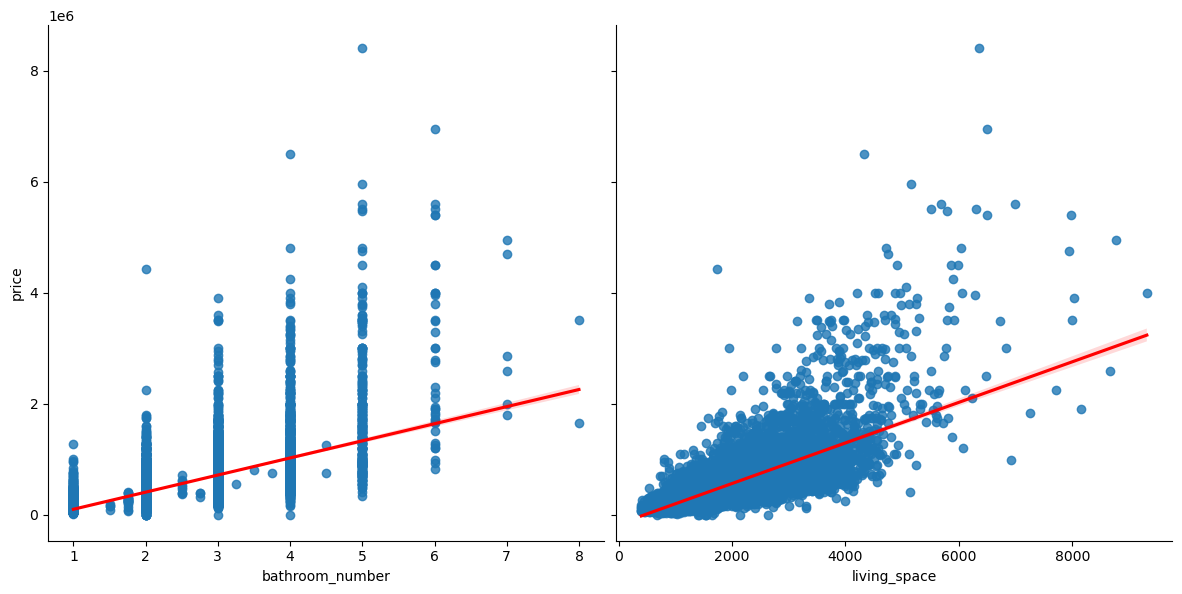

Coefficients:
bathroom_number: 60836.14706558022
living_space: 317.9105964419876


In [26]:
# Extract relevant columns
features = ['bathroom_number', 'living_space']
target = 'price'

# Creating a pair plot to visualize relationships with regression line
sns.pairplot(arizona_state_data, x_vars=features, y_vars=target, kind='reg', height=6, plot_kws={'line_kws':{'color':'red'}})
plt.show()

# Create a linear regression model
model = LinearRegression()

# Extract features and target variable
X = arizona_state_data[features]
y = arizona_state_data[target]

# Fit the model
model.fit(X, y)

# Display coefficients
print("Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef}")

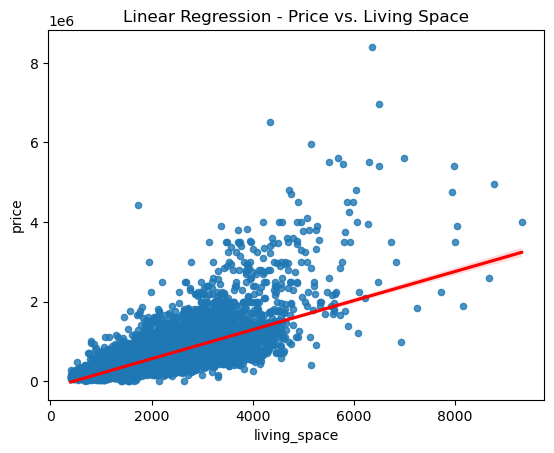

In [27]:
# Select relevant features
features = ['living_space', 'price']

# Drop rows with missing values in selected features
data_for_regression = arizona_state_data[features].dropna()

# Plot the linear regression line
sns.regplot(x='living_space', y='price', data=data_for_regression, scatter_kws={'s': 20}, line_kws={'color': 'red'})
plt.title('Linear Regression - Price vs. Living Space')
plt.show()

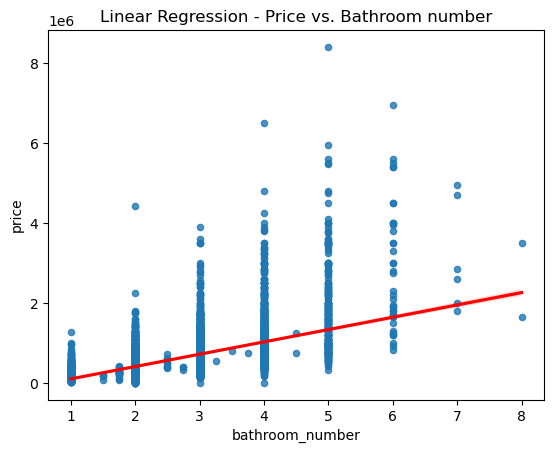

In [28]:
# Select relevant features
features = ['bathroom_number', 'price']

# Drop rows with missing values in selected features
data_for_regression = arizona_state_data[features].dropna()

# Plot the linear regression line
sns.regplot(x='bathroom_number', y='price', data=data_for_regression, scatter_kws={'s': 20}, line_kws={'color': 'red'})
plt.title('Linear Regression - Price vs. Bathroom number')
plt.show()

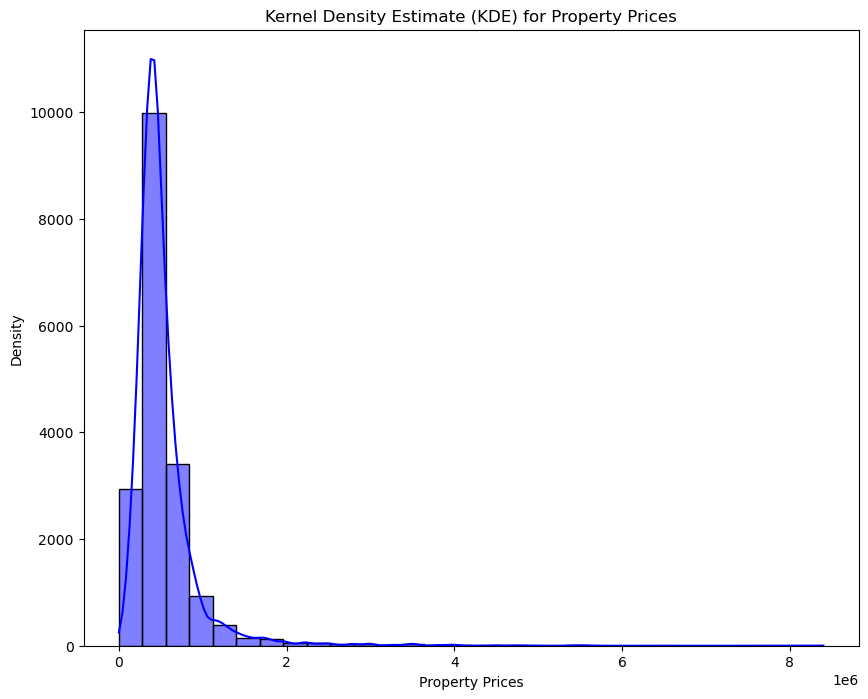

In [29]:
property_prices = arizona_state_data['price']

# Create a KDE plot with seaborn
plt.figure(figsize=(10, 8))
sns.histplot(property_prices, kde=True, bins=30, color="blue", fill=True, cbar_kws={'label': 'Density'})

# Add labels and title
plt.xlabel('Property Prices')
plt.ylabel('Density')
plt.title('Kernel Density Estimate (KDE) for Property Prices')

# Show the plot
plt.show()